In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [3]:
pwd

'/content'

In [4]:
train_data = pd.read_csv('./drive/My Drive/ML_100/day48/data_kaggle/train.csv')
print(train_data.shape)

(999, 40)


In [5]:
train_data.head()

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,-1.4083700642531511,1.1147436351160869,0.91041530967390116,2.2181103179158135,4.3056427290235391,0.088923978050666208,0.1691492586690862,0.41344763764684195,1.5138621708864943,2.6629665829474161,-1.0727654812214888,0.14911112051014644,0.55957919164070269,4.3788846423749064,-0.4636026556416834,-0.063959155289009084,0.54493030536966891,0.71277166708074502,-1.4940501263538932,-2.6361688752136554,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
0,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,0.935347,1.057796,-0.539275,-0.172662,-0.679051,0.607362,1.148635,2.437077,-0.313069,0.528104,-0.513476,0.766221,-1.466939,-2.318885,1.647223,-1.556443,-1.645581,-0.198467,-1.472066,-1.906147,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
1,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,-0.890270,0.909969,-11.851312,3.352420,-4.862125,-0.903317,-1.824344,0.045446,-2.126474,1.161563,-1.027912,-1.078792,1.848525,3.758918,0.623649,-0.091044,-1.033094,-0.254151,-4.377542,-1.196298,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
2,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,-0.713474,-0.136399,0.058990,-1.083458,1.622659,-1.685582,-1.222879,-0.215834,0.155612,0.627873,-0.732789,1.337941,1.335689,0.680062,0.504754,1.204808,0.144477,0.673993,1.027921,3.073382,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
3,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,-0.416575,0.433862,-12.822821,-0.048248,-5.031497,-0.704413,0.515952,-2.635899,-2.359881,-0.053400,0.741432,1.573043,0.723686,1.735602,0.335774,0.572905,0.625971,0.412084,-4.883833,-5.588332,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
4,-0.773247,-0.123227,0.047423,-0.210266,10.377793,0.526604,-2.751616,0.315541,0.608603,-0.043421,0.192455,-0.146712,3.732708,-0.313714,1.566330,0.570415,-2.451730,0.946946,3.118289,0.169902,-0.744261,-1.714586,1.391285,3.897549,0.362316,0.033738,-1.194431,-1.075610,-1.291695,-3.953392,-1.487714,0.792790,-0.540711,0.114115,-0.277477,-0.896411,-2.805207,0.469162,3.614157,0.081689


In [6]:
train_label = pd.read_csv('./drive/My Drive/ML_100/day48/data_kaggle/trainLabels.csv')
print(train_label.shape)

(999, 1)


In [7]:
train_label.head()

,1
0,0
1,0
2,1
3,0
4,1


In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier 

In [0]:
x_train , x_test , y_train , y_test = train_test_split(train_data , train_label , test_size = 0.25 , random_state =4)

In [10]:
clf = GradientBoostingClassifier(random_state=7)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
acc = metrics.accuracy_score(y_test , y_pred)
print('accuracy :' , acc)

accuracy : 0.848


In [12]:
n_estimators = [100 , 200 ,300]
max_depth = [2 , 4 , 6]
param_grid = dict(n_estimators = n_estimators , max_depth = max_depth)

grid_search = GridSearchCV(cv = 3 , estimator=clf , param_grid= param_grid , n_jobs=-1, verbose=1)
grid_result = grid_search.fit(x_train , y_train)

print(grid_result.best_score_)
print(grid_result.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   25.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8518072289156627
{'max_depth': 4, 'n_estimators': 300}


In [13]:
clf_best_param = GradientBoostingClassifier(n_estimators= grid_result.best_params_['n_estimators'] , max_depth = grid_result.best_params_['max_depth'])
clf_best_param.fit(x_train , y_train)

y_pred = clf_best_param.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
acc = metrics.accuracy_score(y_test , y_pred)
print('accuracy :' , acc)

accuracy : 0.868


In [0]:
# https://stackoverflow.com/questions/32940709/missing-first-row-while-reading-from-file-python-pandas
public_test_data = pd.read_csv('./drive/My Drive/ML_100/day48/data_kaggle/test.csv' , header=None)

In [28]:
public_test_data.shape

(9000, 40)

In [0]:
y_pred = clf_best_param.predict(public_test_data)

In [30]:
y_pred.shape

(9000,)

In [0]:
y_pred = pd.Series(y_pred)

In [32]:
import numpy as np

y_pred = pd.DataFrame(y_pred)
y_pred.index = np.arange(1,len(y_pred)+1)
print(y_pred.shape)
print(y_pred.head())

(9000, 1)
   0
1  1
2  0
3  1
4  0
5  0


In [33]:
y_pred = y_pred.reset_index()
print(y_pred.shape)
print(y_pred.head())

(9000, 2)
   index  0
0      1  1
1      2  0
2      3  1
3      4  0
4      5  0


In [34]:
y_pred.columns = ['Id' , 'Solution']
y_pred.head()

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0


In [35]:
y_pred.shape

(9000, 2)

In [0]:
y_pred.to_csv('./drive/My Drive/ML_100/day48/data_kaggle/testLabel.csv' , index=False)

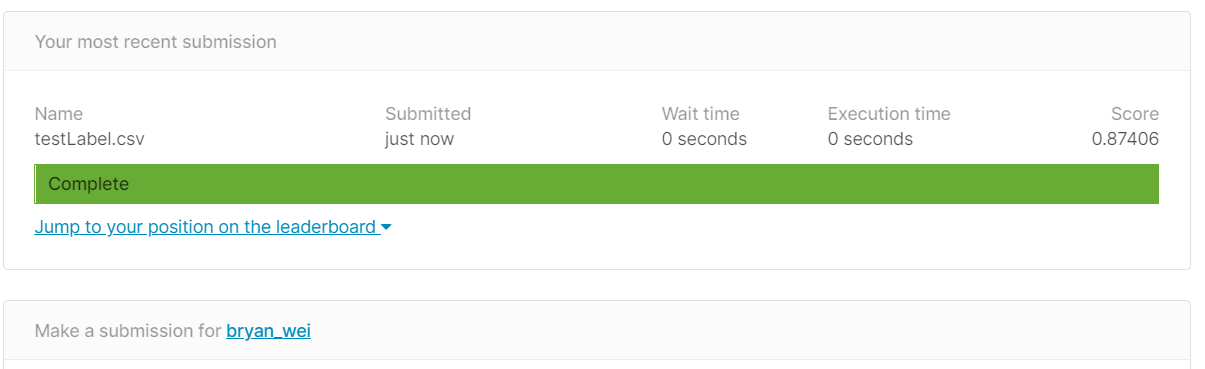

In [39]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('./drive/My Drive/ML_100/day48/data_kaggle/img.PNG')
cv2_imshow(img)